In [ ]:
Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd
import pandas as pd
from sklearn.model_selection import cross_val_predict

Linear regression

In [18]:
def linear_regression(x, w, b):
    return w*x + b

Mean Squared Error 

In [19]:
def mean_squared_error(X,Y, func, w, b):
    return sum(
        [(func(X[i], w, b)-Y[i])**2 for i in range(len(X))]
    ) / len(X)

Gradient Descent

In [20]:
def derivative_mse_w(X,Y,w,b, func):
    return sum([(func(X[i], w, b) - Y[i])*X[i] for i in range(len(X))]) / len(X)

In [21]:
def derivative_mse_b(X,Y,w,b, func):
    return sum([(func(X[i], w, b) - Y[i]) for i in range(len(X))]) / len(X)

In [22]:
def gradient_descent(X, Y, b, w, learn_rate, func):
    w_1 = w - learn_rate * derivative_mse_w(X, Y, w, b, func) 
    b_1 = b - learn_rate * derivative_mse_b(X, Y, w, b, func)
    return w_1, b_1

In [23]:
def train_linear(X, Y, learn_rate, steps=100):
    mse_log = []
    lg_log = pd.DataFrame()
    w = rnd.uniform(-1.0, 1.0)
    b = rnd.uniform(-1.0, 1.0)
    for i in range(steps):
        lg_log[i] = pd.Series([linear_regression(x, w, b) for x in X], index=[x for x in X])
        mse = mean_squared_error(X, Y, linear_regression, w, b)
        mse_log.append(mse)
        if mse < 0.3: return w, b
        w, b = gradient_descent(X, Y, w, b, learn_rate, linear_regression)
    return (mse_log, lg_log)

In [24]:
dataset = pd.read_csv('ex1data1.txt')
mse, lg = train_linear(dataset['x'], dataset['y'], 0.001, 100)

In [25]:
plt.plot(dataset['x'], dataset['y'], 'o')

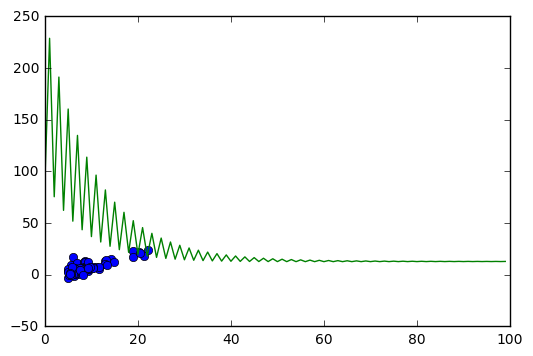

In [14]:
plt.plot(mse)
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
from sklearn.model_selection import cross_val_predict





In [2]:
dataset = pd.read_csv('ex1data1.txt')
lr = linear_model.LinearRegression()
x = dataset['x']
y = dataset['y']

In [3]:
predicted = cross_val_predict(lr, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/home/matvii/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 87]